In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

#Library Modelling
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [132]:
files = pd.read_csv('housing_price.csv')
files.head(20)

,total_rooms,housing_median_age,population,median_house_value
0,880.0,41.0,322.0,452600.0
1,7099.0,21.0,2401.0,358500.0
2,1467.0,52.0,496.0,352100.0
3,1274.0,52.0,558.0,341300.0
4,1627.0,52.0,565.0,342200.0
5,919.0,52.0,413.0,269700.0
6,2535.0,52.0,1094.0,299200.0
7,3104.0,52.0,1157.0,241400.0
8,2555.0,42.0,1206.0,226700.0
9,3549.0,52.0,1551.0,261100.0


In [133]:
files.shape

(100, 4)

In [134]:
files.describe

<bound method NDFrame.describe of     total_rooms  housing_median_age  population  median_house_value
0         880.0                41.0       322.0            452600.0
1        7099.0                21.0      2401.0            358500.0
2        1467.0                52.0       496.0            352100.0
3        1274.0                52.0       558.0            341300.0
4        1627.0                52.0       565.0            342200.0
..          ...                 ...         ...                 ...
95       5329.0                36.0      3469.0            130000.0
96       4596.0                31.0      2048.0            183800.0
97        335.0                29.0       202.0            125000.0
98       3682.0                22.0      2024.0            170000.0
99       3633.0                37.0      1838.0            193100.0

[100 rows x 4 columns]>

In [135]:
files.columns

Index(['total_rooms', 'housing_median_age', 'population',
       'median_house_value'],
      dtype='object')

In [136]:
files.info

<bound method DataFrame.info of     total_rooms  housing_median_age  population  median_house_value
0         880.0                41.0       322.0            452600.0
1        7099.0                21.0      2401.0            358500.0
2        1467.0                52.0       496.0            352100.0
3        1274.0                52.0       558.0            341300.0
4        1627.0                52.0       565.0            342200.0
..          ...                 ...         ...                 ...
95       5329.0                36.0      3469.0            130000.0
96       4596.0                31.0      2048.0            183800.0
97        335.0                29.0       202.0            125000.0
98       3682.0                22.0      2024.0            170000.0
99       3633.0                37.0      1838.0            193100.0

[100 rows x 4 columns]>

In [137]:
korelasi = files.corr()
korelasi

,total_rooms,housing_median_age,population,median_house_value
total_rooms,1.000000,-0.033254,0.920196,0.253887
housing_median_age,-0.033254,1.000000,-0.062477,0.018831
population,0.920196,-0.062477,1.000000,0.129279
median_house_value,0.253887,0.018831,0.129279,1.000000


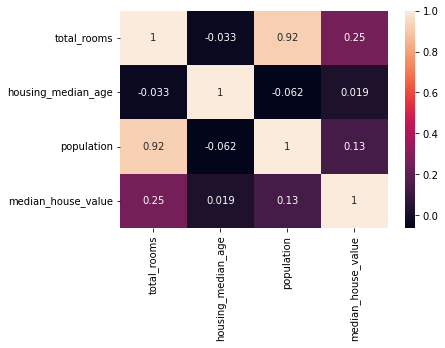

In [138]:
sbs.heatmap(korelasi, annot=True)
plt.show()

In [139]:
files.columns

Index(['total_rooms', 'housing_median_age', 'population',
       'median_house_value'],
      dtype='object')

In [140]:
x = files[['total_rooms', 
           'housing_median_age', 
           'population']]
y = files.median_house_value
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=.2, 
                                                    random_state=21) # untuk membagi data 
print(f'dokumen = {files.shape}\nx_train = {x_train.shape}\nx_test = {x_test.shape}\ny_train = {y_train.shape}\ny_test = {y_test.shape}')

dokumen = (100, 4)
x_train = (80, 3)
x_test = (20, 3)
y_train = (80,)
y_test = (20,)


In [141]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [142]:
prediksi = pd.DataFrame(linreg.predict(x_test))
prediksi.columns = ['y_prediksi']
prediksi['y_prediksi'] = prediksi['y_prediksi'].apply(lambda x : round(x,2))
prediksi['y_asli'] = list(y_test)
prediksi['error'] = abs(prediksi['y_prediksi']-prediksi['y_asli'])
prediksi

,y_prediksi,y_asli,error
0,163339.05,99700.0,63639.05
1,141067.15,112500.0,28567.15
2,155723.96,98200.0,57523.96
3,181605.75,109700.0,71905.75
4,154381.14,86100.0,68281.14
5,152465.62,142500.0,9965.62
6,142676.81,118800.0,23876.81
7,159837.86,115200.0,44637.86
8,131569.64,187500.0,55930.36
9,208009.98,241800.0,33790.02


In [143]:
prediksi.describe()

,y_prediksi,y_asli,error
count,20.000000,20.000000,20.000000
mean,158513.301000,133030.000000,47708.709000
std,19733.409713,53441.055576,24250.277783
min,131569.640000,84400.000000,2836.910000
25%,148914.807500,103300.000000,29638.097500
50%,154325.915000,113200.000000,48200.660000
75%,160713.157500,145725.000000,68434.212500
max,208009.980000,281500.000000,92667.480000


In [144]:
mean_absolute_error(prediksi['y_prediksi'], y_test)

47708.709

In [145]:
files.columns

Index(['total_rooms', 'housing_median_age', 'population',
       'median_house_value'],
      dtype='object')

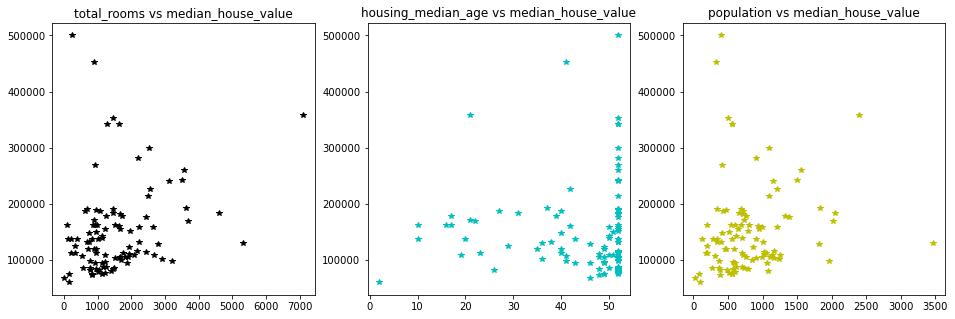

In [146]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.title('total_rooms vs median_house_value')
plt.plot(files['total_rooms'], 
         files.median_house_value, '*k')

plt.subplot(132)
plt.title('housing_median_age vs median_house_value')
plt.plot(files['housing_median_age'], 
         files.median_house_value, '*c')

plt.subplot(133)
plt.title('population vs median_house_value')
plt.plot(files['population'], 
         files.median_house_value, '*y') 
plt.show()

In [147]:
files.columns

Index(['total_rooms', 'housing_median_age', 'population',
       'median_house_value'],
      dtype='object')

In [148]:
x = files.iloc[:,:-1]
y = files.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state=21, 
                                                    test_size=.2)
print(x_train.shape, 
      x_test.shape, 
      y_train.shape, 
      y_test.shape)

(80, 3) (20, 3) (80,) (20,)


In [149]:
lr = LinearRegression()
lr.fit(x_train, y_train)

las = Lasso(alpha=.01)
las.fit(x_train, y_train)

rid = Ridge(alpha=.01)
rid.fit(x_train, y_train)

svr = SVR()
svr.fit(x_train, y_train)

dt = DecisionTreeRegressor( max_depth=6, random_state=34)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=34)

In [150]:
model = ['lr','las','rid','svr','dt']

mae = []
mae.append(mean_absolute_error(lr.predict(x_train), y_train))
mae.append(mean_absolute_error(las.predict(x_train), y_train))
mae.append(mean_absolute_error(rid.predict(x_train), y_train))
mae.append(mean_absolute_error(svr.predict(x_train), y_train))
mae.append(mean_absolute_error(dt.predict(x_train), y_train))

mse = []
mse.append(mean_squared_error(lr.predict(x_train), y_train))
mse.append(mean_squared_error(las.predict(x_train), y_train))
mse.append(mean_squared_error(rid.predict(x_train), y_train))
mse.append(mean_squared_error(svr.predict(x_train), y_train))
mse.append(mean_squared_error(dt.predict(x_train), y_train))

r2 = []
r2.append(r2_score(lr.predict(x_train), y_train))
r2.append(r2_score(las.predict(x_train), y_train))
r2.append(r2_score(rid.predict(x_train), y_train))
r2.append(r2_score(svr.predict(x_train), y_train))
r2.append(r2_score(dt.predict(x_train), y_train))

metrics_train = pd.DataFrame({'Model' : model, 'MAE_train' : mae, 'MSE_train' : mse, 'R^2_train' : r2})
metrics_train

,Model,MAE_train,MSE_train,R^2_train
0,lr,53376.585777,6.136377e+09,-5.503205e+00
1,las,53376.585651,6.136377e+09,-5.503205e+00
2,rid,53376.585344,6.136377e+09,-5.503205e+00
3,svr,55887.032197,7.438262e+09,-1.161338e+09
4,dt,16004.832251,5.683615e+08,9.127156e-01


In [151]:
mae = []
mae.append(mean_absolute_error(lr.predict(x_test), y_test))
mae.append(mean_absolute_error(las.predict(x_test), y_test))
mae.append(mean_absolute_error(rid.predict(x_test), y_test))
mae.append(mean_absolute_error(svr.predict(x_test), y_test))
mae.append(mean_absolute_error(dt.predict(x_test), y_test))

mse = []
mse.append(mean_squared_error(lr.predict(x_test), y_test))
mse.append(mean_squared_error(las.predict(x_test), y_test))
mse.append(mean_squared_error(rid.predict(x_test), y_test))
mse.append(mean_squared_error(svr.predict(x_test), y_test))
mse.append(mean_squared_error(dt.predict(x_test), y_test))

r2 = []
r2.append(r2_score(lr.predict(x_test), y_test))
r2.append(r2_score(las.predict(x_test), y_test))
r2.append(r2_score(rid.predict(x_test), y_test))
r2.append(r2_score(svr.predict(x_test), y_test))
r2.append(r2_score(dt.predict(x_test), y_test))

metrics_test = pd.DataFrame({'Model' : model, 'MAE_test' : mae, 'MSE_test' : mse, 'R^2_test' : r2})
metrics_test

,Model,MAE_test,MSE_test,R^2_test
0,lr,47708.709552,2.834793e+09,-6.662907e+00
1,las,47708.709392,2.834793e+09,-6.662907e+00
2,rid,47708.708993,2.834793e+09,-6.662907e+00
3,svr,41970.559477,2.733054e+09,-4.339341e+08
4,dt,34341.612554,2.400867e+09,-7.037317e-01


In [152]:
metrics = metrics_train.merge(metrics_test, on='Model')
metrics = metrics[['Model', 'MAE_train', 'MAE_test', 'MSE_train', 'MSE_test', 'R^2_train','R^2_test']]
metrics

,Model,MAE_train,MAE_test,MSE_train,MSE_test,R^2_train,R^2_test
0,lr,53376.585777,47708.709552,6.136377e+09,2.834793e+09,-5.503205e+00,-6.662907e+00
1,las,53376.585651,47708.709392,6.136377e+09,2.834793e+09,-5.503205e+00,-6.662907e+00
2,rid,53376.585344,47708.708993,6.136377e+09,2.834793e+09,-5.503205e+00,-6.662907e+00
3,svr,55887.032197,41970.559477,7.438262e+09,2.733054e+09,-1.161338e+09,-4.339341e+08
4,dt,16004.832251,34341.612554,5.683615e+08,2.400867e+09,9.127156e-01,-7.037317e-01


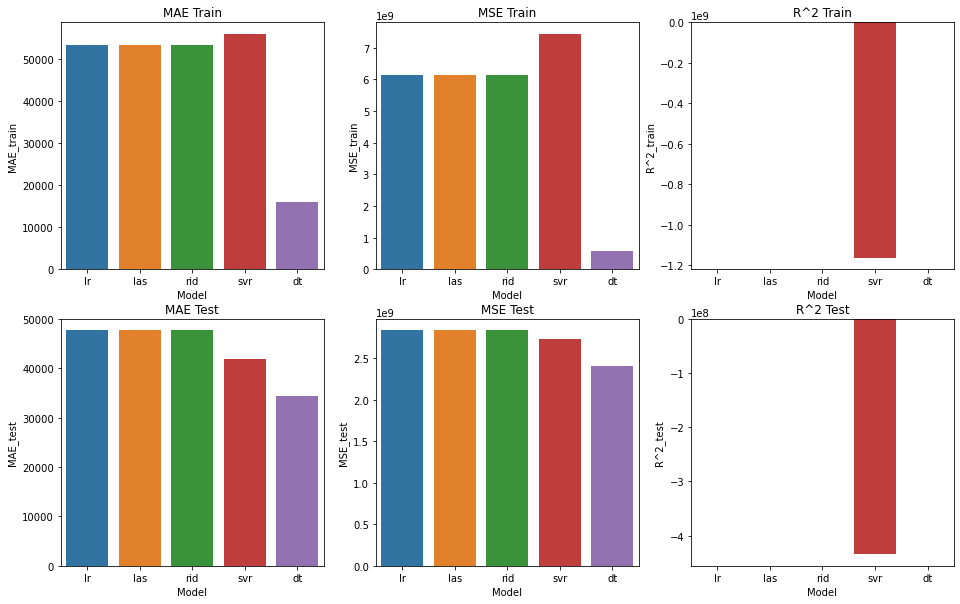

In [153]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.title('MAE Train')
sbs.barplot(x=metrics.Model, y=metrics.MAE_train)

plt.subplot(234)
plt.title('MAE Test')
sbs.barplot(x=metrics.Model, y=metrics.MAE_test)

plt.subplot(232)
plt.title('MSE Train')
sbs.barplot(x=metrics.Model, y=metrics.MSE_train)

plt.subplot(235)
plt.title('MSE Test')
sbs.barplot(x=metrics.Model, y=metrics.MSE_test)

plt.subplot(233)
plt.title('R^2 Train')
sbs.barplot(x=metrics.Model, y=metrics['R^2_train'])

plt.subplot(236)
plt.title('R^2 Test')
sbs.barplot(x=metrics.Model, y=metrics['R^2_test'])
plt.show()

[]

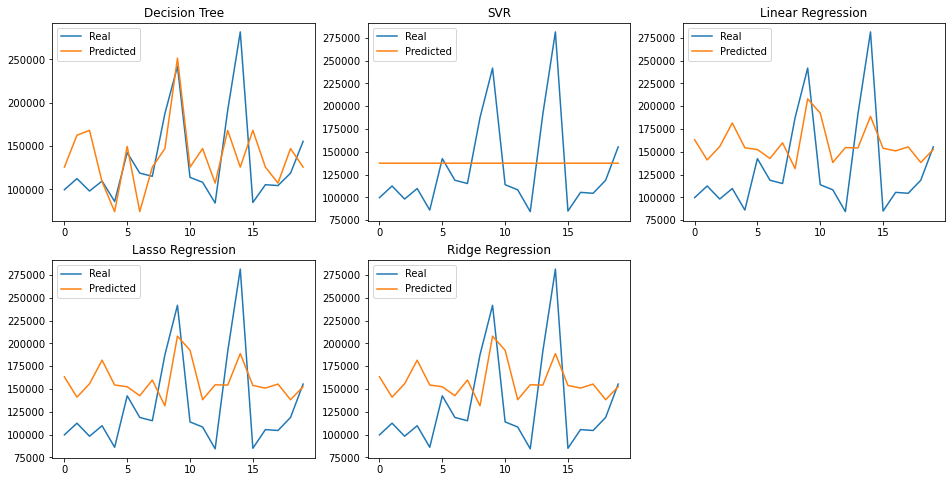

In [154]:
plt.figure(figsize=(16,8))
plt.subplot(231)
plt.title('Decision Tree')
plt.plot(y_test.values)
plt.plot(dt.predict(x_test))
plt.legend(labels=['Real','Predicted'])

plt.subplot(232)
plt.title('SVR')
plt.plot(y_test.values)
plt.plot(svr.predict(x_test))
plt.legend(labels=['Real','Predicted'])

plt.subplot(233)
plt.title('Linear Regression')
plt.plot(y_test.values)
plt.plot(lr.predict(x_test))
plt.legend(labels=['Real','Predicted'])

plt.subplot(234)
plt.title('Lasso Regression')
plt.plot(y_test.values)
plt.plot(las.predict(x_test))
plt.legend(labels=['Real','Predicted'])

plt.subplot(235)
plt.title('Ridge Regression')
plt.plot(y_test.values)
plt.plot(rid.predict(x_test))
plt.legend(labels=['Real','Predicted'])

plt.plot()